## Linear Regression

### Manish Yadav
#### raomaniyadav@gmail.com

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

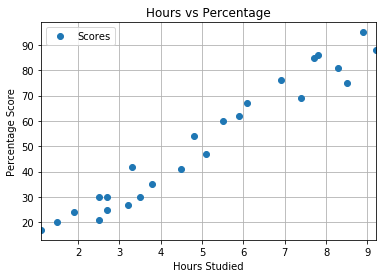

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [29]:
x = data.iloc[:,:-1].values  #store feature values only
y = data.iloc[:, 1].values  #target values

In [30]:
x[:3]

array([[2.5],
       [5.1],
       [3.2]])

In [31]:
y[:3]

array([21, 47, 27], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [32]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [33]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
model.intercept_

1.1762384016761729

In [35]:
model.coef_

array([9.93985708])

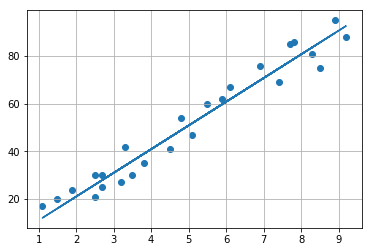

In [36]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [37]:
y_act=y_test 
y_pred = model.predict(x_test) # Predicting the scores

In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_act, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,41,45.905595
1,62,59.821395
2,85,77.713138
3,30,26.025881
4,76,69.761252
5,42,33.977767
6,75,85.665024


In [42]:
# You can also test with your own data
hours = [[9.25]]
value_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(value_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.11991637982638


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error  


In [44]:
print("MAE",mean_absolute_error(y_act,y_pred))
print("MSE",mean_squared_error(y_act,y_pred))

MAE 6.181597949715653
MSE 44.960584497541106
